This project will be all about regression. I need to choose between Ordinary Least Square or using Gradient Descent

In [37]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [38]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

In [39]:
df = pd.read_csv("datasets/Final_data.csv")
df_two = pd.read_csv("datasets/expanded_fitness_data.csv")

In [40]:
df.head(10)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,meal_name,meal_type,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,26.800377,1.50,3.99,2.01,24.87,2.99,0.01,267.68,106.05,71.63,1806.0,Other,Lunch,Vegan,31.77,1729.94,285.05,120.47,Grilled,16.24,110.79,1.31,Decline Push-ups,4.99,20.91,Improves shoulder health and posture,342.58,"Shoulders, Triceps",Cable Machine,Advanced,Legs,Lats,Dumbbell flyes,24.870447,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,27.655021,1.90,4.00,2.01,23.48,3.01,0.97,214.32,85.41,56.97,1577.0,Other,Lunch,Vegetarian,12.34,693.08,300.61,109.15,Fried,16.47,12.01,1.92,Bear Crawls,4.01,16.15,Strengthens lower abs,357.16,"Back, Core, Shoulders",Step or Box,Intermediate,Chest,Lats,Lateral raises,23.479709,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,24.320821,1.88,2.99,1.02,21.15,1.99,-0.02,246.04,98.11,65.48,1608.0,Other,Breakfast,Paleo,42.81,2142.48,215.42,399.43,Boiled,54.35,6.09,4.70,Dips,5.00,21.90,Builds chest strength,359.63,"Quadriceps, Glutes",Step or Box,Intermediate,Arms,Grip Strength,Standing calf raises,21.148123,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,32.813572,2.50,3.99,1.99,32.45,3.00,0.04,203.22,80.84,54.56,2657.0,Other,Lunch,Paleo,9.34,123.20,9.70,314.31,Fried,27.73,103.72,4.85,Mountain Climbers,4.01,16.92,Improves coordination and cardiovascular health,351.65,"Biceps, Forearms",Parallel Bars or Chair,Advanced,Shoulders,Upper,Incline dumbbell flyes,32.449827,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,17.307319,2.91,4.00,2.00,14.83,3.00,3.00,332.79,133.05,88.43,1470.0,Other,Breakfast,Vegan,23.78,1935.11,116.89,99.22,Baked,34.16,46.55,3.07,Bicep Curls,4.99,15.01,Targets obliques and improves core rotation,329.36,"Chest, Triceps",Wall,Advanced,Abs,Wrist Flexors,Military press,14.831372,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
5,53.19,Female,105.05,1.84,176.52,130.60,61.84,0.69,453.33,Yoga,32.049064,2.91,3.02,1.00,31.03,2.99,-0.04,170.86,67.92,46.06,2767.0,Other,Snack,Keto,15.89,2382.39,36.38,416.54,Steamed,20.98,54.64,3.38,Leg Press,4.00,25.10,Builds explosive power,374.56,"Core, Obliques",Resistance Band or Cable Machine,Beginner,Arms,Wrist Flexors,Skull crushers,31.028474,1369.66,0.498985,0.646549,0.599581,0.739860,2313.67,71.382458,516.8928,1.505159e+20,Very High
6,23.17,Male,58.41,1.78,184.75,140.90,58.01,1.67,1953.90,Strength,20.546292,2.71,4.96,3.00,18.44,2.02,-0.03,280.33,112.35,74.97,1867.0,Other,Breakfast,Low-Carb,12.48,2220.46,56.69,289.93,Fried,52.43,46.08,3.81,Thrusters,5.01,25.04,Strengthens back and improves posture,328.94,Core,None or Dumbbells,Advanced,Shoulders,Wrist Flexors,Barbell rows,18.435172,2245.45,0.499374,1.923472,0.654016,0.762652,-86.90,46.408911,1098.6596,5.210106e+19,Low
7,55.92,Female,84.07,1.63,183.87,141.12,51.79,1.01,727.81,Yoga,32.088176,2.88,3.97,2.01,31.64,2.99,0.00,262.57,105.41,70.37,2191.0,Other,Snack,Low-Carb,2.87,1501.99,74.70,487.6

In [41]:
df_two.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,meal_name,meal_type,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,26.800377,1.50,3.99,2.01,24.87,2.99,0.01,267.68,106.05,71.63,1806.0,Affect Stew,Lunch,Vegan,31.77,1729.94,285.05,120.47,Grilled,16.24,110.79,1.31,-0.00,Decline Push-ups,4.99,20.91,Improves shoulder health and posture,342.58,"Shoulders, Triceps",Cable Machine,Advanced,Legs,Lats,Dumbbell flyes
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,27.655021,1.90,4.00,2.01,23.48,3.01,0.97,214.32,85.41,56.97,1577.0,Writer Rice,Lunch,Vegetarian,12.34,693.08,300.61,109.15,Fried,16.47,12.01,1.92,0.01,Bear Crawls,4.01,16.15,Strengthens lower abs,357.16,"Back, Core, Shoulders",Step or Box,Intermediate,Chest,Lats,Lateral raises
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,24.320821,1.88,2.99,1.02,21.15,1.99,-0.02,246.04,98.11,65.48,1608.0,Television Stew,Breakfast,Paleo,42.81,2142.48,215.42,399.43,Boiled,54.35,6.09,4.70,0.00,Dips,5.00,21.90,Builds chest strength,359.63,"Quadriceps, Glutes",Step or Box,Intermediate,Arms,Grip Strength,Standing calf raises
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,32.813572,2.50,3.99,1.99,32.45,3.00,0.04,203.22,80.84,54.56,2657.0,Plant Curry,Lunch,Paleo,9.34,123.20,9.70,314.31,Fried,27.73,103.72,4.85,0.01,Mountain Climbers,4.01,16.92,Improves coordination and cardiovascular health,351.65,"Biceps, Forearms",Parallel Bars or Chair,Advanced,Shoulders,Upper,Incline dumbbell flyes
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,17.307319,2.91,4.00,2.00,14.83,3.00,3.00,332.79,133.05,88.43,1470.0,Her Stew,Breakfast,Vegan,23.78,1935.11,116.89,99.22,Baked,34.16,46.55,3.07,0.01,Bicep Curls,4.99,15.01,Targets obliques and improves core rotation,329.36,"Chest, Triceps",Wall,Advanced,Abs,Wrist Flexors,Military press
5,53.19,Female,105.05,1.84,176.52,130.60,61.84,0.69,453.33,Yoga,32.049064,2.91,3.02,1.00,31.03,2.99,-0.04,170.86,67.92,46.06,2767.0,Plan Salad,Snack,Keto,15.89,2382.39,36.38,416.54,Steamed,20.98,54.64,3.38,0.01,Leg Press,4.00,25.10,Builds explosive power,374.56,"Core, Obliques",Resistance Band or Cable Machine,Beginner,Arms,Wrist Flexors,Skull crushers
6,23.17,Male,58.41,1.78,184.75,140.90,58.01,1.67,1953.90,Strength,20.546292,2.71,4.96,3.00,18.44,2.02,-0.03,280.33,112.35,74.97,1867.0,Relationship Rice,Breakfast,Low-Carb,12.48,2220.46,56.69,289.93,Fried,52.43,46.08,3.81,1.00,Thrusters,5.01,25.04,Strengthens back and improves posture,328.94,Core,None or Dumbbells,Advanced,Shoulders,Wrist Flexors,Barbell rows
7,55.92,Female,84.07,1.63,183.87,141.12,51.79,1.01,727.81,Yoga,32.088176,2.88,3.97,2.01,31.64,2.99,0.00,262.57,105.41,70.37,2191.0,Cultural Rice,Snack,Low-Carb,2.87,1501.99,74.70,487.67,Raw,38.57,36.64,3.16,-0.00,Turkish Get-ups,4.97,18.95,Improves core stability and upper body strength,363.56,"Back, Biceps",Pull-up Bar,Intermediate,Back,Lower,Hammer curl
8,24.11,Female,88.58,1.79,176.78,154.07,65.19,1.76,2062.37,Strength,27.367246,3.49,4.01,3.02,27.65,3.00,0.02,173.08,69.44,45.91,2587.0,Leader Sandwich,Lunch,Vegan,0.72,293.36,188.26,123.56,Boiled,45.85,14.31,2.81,-0.00,Glute Bridges,3.99,24.10,Full body workout,349.51,"Upper Chest, Triceps",Barbell,Beginner,Chest,Middle,Russian twists
9,39.19,Female,50.32,1.60,166.88,128.04,49.91,1.17,1157.25,Strength,21.909379,2.49,2.00,1.00,19.66,3.01,0.02,191.06,76.76,50.71,1247.0,Fact Curry,Lunch,Paleo,50.02,757.93,291.34,415.04,Grilled,18.95,26.51,1.60,0.00,Step-ups,4.02,16.09,Bui

In [42]:
print(df_two.columns)
print("\n")

df_two.describe()

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min', 'cook_time_min', 'rating', 'is_healthy', 'Name of Exercise', 'Sets', 'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout'], dtype='object')




,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,prep_time_min,cook_time_min,rating,is_healthy,Sets,Reps,Burns Calories (per 30 min)
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,3.318629,1.809176,24.921680,2.864804,0.452503,249.778592,99.91829,66.612172,2024.418300,24.531042,1258.139709,148.465602,302.719499,33.517447,61.502164,2.989303,0.088516,4.425059,19.427316,344.046515
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,0.911198,0.736204,6.701126,0.636649,0.986628,55.108623,22.04367,14.699284,541.891521,14.446105,716.618987,87.382817,115.711949,16.526869,33.579746,1.157692,0.284207,0.579596,3.679707,32.138782
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,1.940000,1.000000,12.040000,1.950000,-0.070000,137.720000,55.17000,36.590000,781.000000,-0.670000,19.220000,-3.890000,95.950000,3.950000,3.350000,0.930000,-0.020000,2.960000,4.850000,128.750000
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,2.980000,1.010000,20.097500,2.020000,-0.010000,207.547500,83.04000,55.340000,1634.000000,11.990000,645.127500,71.970000,207.217500,18.587500,32.477500,1.940000,-0.000000,4.000000,16.120000,337.600000
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,3.010000,1.990000,24.120000,3.000000,0.010000,242.900000,97.14500,64.770000,1919.000000,24.060000,1267.650000,149.795000,300.015000,34.330000,60.920000,3.000000,0.000000,4.020000,19.900000,348.605000
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,4.000000,2.020000,28.560000,3.010000,0.040000,283.975000,113.64000,75.752500,2360.000000,37.490000,1850.892500,221.840000,401.860000,47.940000,89.375000,4.000000,0.010000,5.000000,22.880000,360.472500
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,5.060000,3.050000,50.230000,4.040000,4.050000,462.490000,185.34000,123.420000,3641.000000,50.510000,2527.270000,303.990000,507.520000,61.290000,121.460000,5.060000,1.020000,5.050000,30.120000,381.710000


In [43]:
# finish this function 
# finsih inputting test_size and random_state values

def splitdataset(df):
    X = df.drop(columns=['Calories_Burned'])
    y = df['Calories_Burned']

    X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X, y, X_train, X_test, y_train, y_test





In [44]:
def clean_data(X):
        cols_to_drop = [
        'Name of Exercise', 'meal_name', 'Workout', 'cooking_method', 'Benefit',
        'Target Muscle Group', 'Equipment Needed', 'Body Part', 'Type of Muscle',
        'Difficulty Level', 'Workout_Type', 'diet_type', 'meal_type',
        'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin', 'BMI_calc',
        'cal_from_macros', 'pct_carbs', 'pct_HRR', 'pct_maxHR',
        'cal_balance', 'prep_time_min', 'cook_time_min'
    ]
        X = X.drop(columns=[col for col in cols_to_drop if col in X.columns])
        X = X.dropna()
        
        return X.reset_index(drop=True)

In [58]:

print("before clean: \n")
print(df.columns)
print(df.shape)
df_clean = clean_data(df)

print("\nAfter Clean: \n",df_clean.shape)
df_clean.columns

before clean: 

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets', 'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'], dtype='object')
(20000, 54)

After Clean: 
 (20000, 31)


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'rating', 'Sets', 'Reps', 'Burns Calories (per 30 min)', 'protein_per_kg', 'lean_mass_kg', 'expected_burn'], dtype='object')

In [46]:
# Predict Daily Water Intake
# Ok I will try to single out columns for a linear regression question I have: Does exercise intensity and body composition predict how much water a person drinks daily?
# Features: Workout_Frequency (days/week), Session_Duration (hours), Calories_Burned, Weight (kg), Avg_BPM, Fat_Percentage
# Target: Water_Intake (liters)

def clean_prob_one(X):
    cols_to_keep = ['Workout_Frequency (days/week)','Name of Exercise','Session_Duration (hours)', 'Calories_Burned', 'Weight (kg)','Avg_BPM','Fat_Percentage','Water_Intake (liters)']
    X = X.loc[:,cols_to_keep]

    return X


print("applying cleaned function for first regression question/problem: \n")
prob_one = clean_prob_one(df)
prob_one.columns

applying cleaned function for first regression question/problem: 



Index(['Workout_Frequency (days/week)', 'Name of Exercise', 'Session_Duration (hours)', 'Calories_Burned', 'Weight (kg)', 'Avg_BPM', 'Fat_Percentage', 'Water_Intake (liters)'], dtype='object')

In [ ]:
def regression_clean(df):
    cols_to_keep = ['Workout_Frequency (days/week)','Session_Duration (hours)', 'Calories_Burned', 'Weight (kg)','Avg_BPM','Fat_Percentage','Water_Intake (liters)']
    df_clean  = df.loc[:,cols_to_keep]
    return df_clean

df_clean = regression_clean(df)

# Split the CLEANED data, not the original df
X, y, X_train, X_test, y_train, y_test = splitdataset(df_clean)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [48]:
# These will reveal the truth:
print("Average Water Intake by Session Duration:")
print(df.groupby('Session_Duration (hours)')['Water_Intake (liters)'].mean())

print("\nAverage Water Intake by Workout Frequency:")
print(df.groupby('Workout_Frequency (days/week)')['Water_Intake (liters)'].mean())

Average Water Intake by Session Duration:
Session_Duration (hours)
0.49    1.834286
0.50    2.106800
0.51    2.153333
0.52    2.567761
0.53    2.785417
0.54    2.556329
0.55    2.386914
0.56    2.182090
0.57    2.691270
0.58    2.710635
0.59    2.676977
0.60    2.697222
0.61    2.623067
0.62    2.213889
0.63    2.160755
0.64    2.364706
0.65    2.566190
0.66    2.618939
0.67    2.740385
0.68    2.676264
0.69    2.585122
0.70    2.622187
0.71    2.751918
0.72    2.887848
0.73    2.734340
0.74    2.600109
0.75    2.702294
0.76    2.635370
0.77    3.059806
0.78    3.097500
0.79    2.920732
0.80    2.425507
0.81    2.447500
0.82    2.389612
0.83    2.510000
0.84    2.486250
0.85    2.172022
0.86    1.957414
0.87    2.213793
0.88    2.530635
0.89    2.497236
0.90    2.533838
0.91    2.550366
0.92    2.332558
0.93    2.328193
0.94    2.275075
0.95    2.115102
0.96    2.293929
0.97    2.281765
0.98    2.364222
0.99    2.386316
1.00    2.600054
1.01    2.612244
1.02    2.546694
1.03    2.42687

In [49]:
# Try WITHOUT the interaction terms first
feature_columns_simple = [
    'Workout_Frequency (days/week)',
    'Session_Duration (hours)', 
    'Calories_Burned',
    'Weight (kg)',
    'Avg_BPM',
    'Fat_Percentage'
    # REMOVE the interaction terms
]

X_simple = df[feature_columns_simple]
y = df['Water_Intake (liters)']

# Retrain and check coefficients
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

print("=== SIMPLE MODEL (No Interactions) ===")
for feature, coef in zip(X_simple.columns, model_simple.coef_):
    print(f"{feature}: {coef:.4f}")

=== SIMPLE MODEL (No Interactions) ===
Workout_Frequency (days/week): 0.0546
Session_Duration (hours): 0.3102
Calories_Burned: 0.0001
Weight (kg): 0.0178
Avg_BPM: -0.0000
Fat_Percentage: -0.0348


In [64]:
# Make predictions with the SIMPLE model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


predictions_simple = model_simple.predict(X_test_s)

# Evaluate the SIMPLE model correctly
print("=== SIMPLE MODEL Results ===")
print(f"R² Score: {r2_score(y_test_s, predictions_simple):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_s, predictions_simple):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_s, predictions_simple)):.4f}")

# Show SIMPLE model coefficients
print("\n=== Simple Model Coefficients ===")
for feature, coef in zip(X_simple.columns, model_simple.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model_simple.intercept_:.4f}")

# Compare actual vs predicted
print("\n=== Actual vs Predicted (first 10) ===")
comparison = pd.DataFrame({
    'Actual': y_test_s.values[:10],
    'Predicted': predictions_simple[:10],
    'Difference': y_test_s.values[:10] - predictions_simple[:10]
})
print(comparison)

=== SIMPLE MODEL Results ===
R² Score: 0.2800
Mean Absolute Error: 0.4111
Root Mean Squared Error: 0.5072

=== Simple Model Coefficients ===
Workout_Frequency (days/week): 0.0546
Session_Duration (hours): 0.3102
Calories_Burned: 0.0001
Weight (kg): 0.0178
Avg_BPM: -0.0000
Fat_Percentage: -0.0348
Intercept: 1.5408

=== Actual vs Predicted (first 10) ===
   Actual  Predicted  Difference
0    3.08   3.191542   -0.111542
1    3.50   2.780982    0.719018
2    1.91   2.371558   -0.461558
3    3.50   2.711009    0.788991
4    2.28   2.256451    0.023549
5    2.09   2.474832   -0.384832
6    3.48   3.119270    0.360730
7    2.59   2.690703   -0.100703
8    2.38   2.471491   -0.091491
9    2.99   2.562006    0.427994


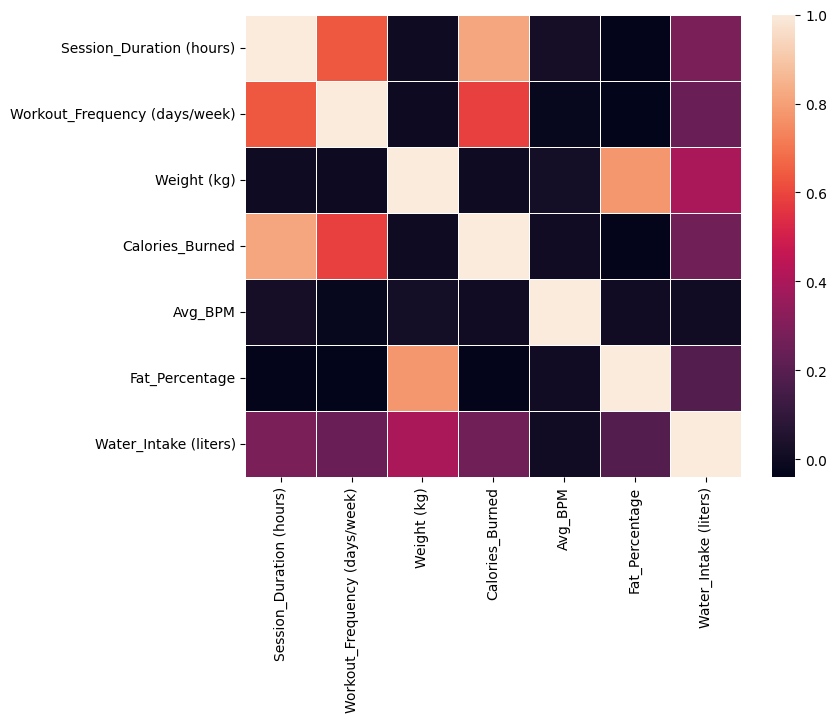

Session_Duration (hours)         float64
Workout_Frequency (days/week)    float64
Weight (kg)                      float64
Calories_Burned                  float64
Avg_BPM                          float64
Fat_Percentage                   float64
Water_Intake (liters)            float64
dtype: object


In [69]:
# gonna try to find strong correlations between Calories_Burned and Avg_BPM
# experiment two
target_cols = [
    "Session_Duration (hours)",
    "Workout_Frequency (days/week)", 
    "Weight (kg)",
    "Calories_Burned",
    "Avg_BPM", 
    "Fat_Percentage",
    "Water_Intake (liters)"
]

data_two = df[target_cols]


plt.figure(figsize=(8,6))

sns.heatmap(
    data_two.corr(), linewidth=0.5
)
plt.show()
print(df[target_cols].dtypes)

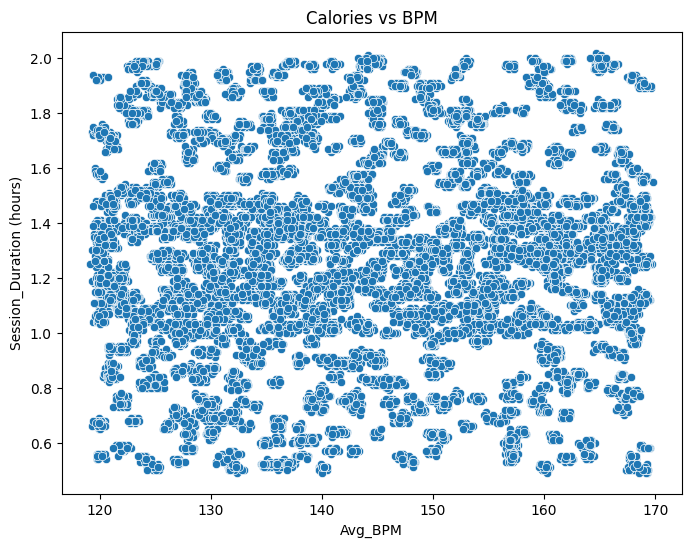

In [74]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Avg_BPM', y='Session_Duration (hours)', data=df)
plt.title('Calories vs BPM')
plt.show()

In [73]:

df.corr(numeric_only=True)['Calories_Burned'].sort_values(ascending=False)


Calories_Burned                   1.000000
Session_Duration (hours)          0.814368
expected_burn                     0.773932
Experience_Level                  0.697116
Workout_Frequency (days/week)     0.582787
Water_Intake (liters)             0.262731
cholesterol_mg                    0.072296
Physical exercise                 0.049113
Calories                          0.047981
Reps                              0.043237
serving_size_g                    0.029458
Daily meals frequency             0.028158
rating                            0.025625
Sets                              0.024164
lean_mass_kg                      0.023134
Carbs                             0.011929
cal_from_macros                   0.011817
Fats                              0.011769
Proteins                          0.011602
pct_HRR                           0.010506
pct_carbs                         0.009419
Height (m)                        0.009211
Avg_BPM                           0.007984
Burns Calor

In [78]:
df_age = df.query('20 <= Age <= 25')
print("Correlations around ages 20-25, based on Calories_Burned")
df_age.corr(numeric_only=True)['Calories_Burned'].sort_values(ascending=False)


Correlations around ages 20-25, based on Calories_Burned


Calories_Burned                   1.000000
Session_Duration (hours)          0.825102
expected_burn                     0.799638
Experience_Level                  0.722552
Workout_Frequency (days/week)     0.608916
Water_Intake (liters)             0.287791
cholesterol_mg                    0.163194
Reps                              0.151563
Sets                              0.146409
Physical exercise                 0.108138
Calories                          0.093417
rating                            0.089456
lean_mass_kg                      0.074838
Daily meals frequency             0.073116
BMI_calc                          0.060412
BMI                               0.060410
Weight (kg)                       0.047193
Burns Calories (per 30 min)       0.042601
Height (m)                        0.031335
Max_BPM                           0.028125
prep_time_min                     0.021142
Avg_BPM                           0.018730
Fat_Percentage                    0.012062
pct_HRR    

In [81]:
df_age = df.query('18 <= Age <= 20')
print("Correlations from ages 18-20, based on Calories_Burned")
df_age.corr(numeric_only=True)["Calories_Burned"].sort_values(ascending=False)

Correlations from ages 18-20, based on Calories_Burned


Calories_Burned                   1.000000
Session_Duration (hours)          0.799326
expected_burn                     0.763474
Experience_Level                  0.698174
Workout_Frequency (days/week)     0.532145
Water_Intake (liters)             0.334922
Sets                              0.216865
prep_time_min                     0.189211
pct_HRR                           0.147279
cholesterol_mg                    0.134003
pct_maxHR                         0.125984
Avg_BPM                           0.116813
cook_time_min                     0.109922
Height (m)                        0.094213
rating                            0.083821
Calories                          0.083120
lean_mass_kg                      0.074175
sugar_g                           0.054032
Weight (kg)                       0.032887
Reps                              0.032331
Proteins                          0.024882
cal_from_macros                   0.024467
Carbs                             0.024415
Fats       

In [80]:
df_age = df.query('18 <= Age <= 20')
print("Correlations from ages 18-20, based on Max_BPM")
df_age.corr(numeric_only=True)["Max_BPM"].sort_values(ascending=False)

Correlations from ages 18-20, based on Max_BPM


Max_BPM                           1.000000
Proteins                          0.205759
Carbs                             0.204991
cal_from_macros                   0.204914
Fats                              0.204111
prep_time_min                     0.128284
Avg_BPM                           0.125146
protein_per_kg                    0.121918
cook_time_min                     0.069778
cholesterol_mg                    0.069208
sodium_mg                         0.068144
Water_Intake (liters)             0.058373
Burns Calories (per 30 min)       0.046064
Physical exercise                 0.045369
Age                               0.030193
Fat_Percentage                    0.026863
Daily meals frequency             0.023699
cal_balance                       0.020995
Height (m)                        0.015930
expected_burn                     0.012888
Weight (kg)                       0.011486
Resting_BPM                       0.011300
pct_carbs                         0.003773
Calories   

In [82]:
df_age = df.query('18 <= Age <= 20')
print("Correlations from ages 18-20, based on lean_mass_kg")
df_age.corr(numeric_only=True)["lean_mass_kg"].sort_values(ascending=False)

Correlations from ages 18-20, based on lean_mass_kg


lean_mass_kg                      1.000000
Weight (kg)                       0.980396
Calories                          0.964410
BMI                               0.728338
BMI_calc                          0.728327
cal_balance                       0.695460
Fat_Percentage                    0.590521
Height (m)                        0.580361
Water_Intake (liters)             0.398892
Sets                              0.259050
Burns Calories (per 30 min)_bc    0.250557
Proteins                          0.166177
Carbs                             0.165354
cal_from_macros                   0.165252
Fats                              0.164376
Age                               0.160393
prep_time_min                     0.157874
Burns Calories (per 30 min)       0.147295
expected_burn                     0.134034
Avg_BPM                           0.124776
pct_maxHR                         0.121377
pct_HRR                           0.117689
Experience_Level                  0.104219
Session_Dur

In [51]:
prob_one.describe()

,Workout_Frequency (days/week),Session_Duration (hours),Calories_Burned,Weight (kg),Avg_BPM,Fat_Percentage,Water_Intake (liters)
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,3.318629,1.259446,1280.109600,73.898832,143.704306,26.101313,2.627485
std,0.911198,0.341336,502.228982,21.173010,14.267688,4.996160,0.604724
min,1.940000,0.490000,323.110000,39.180000,119.070000,11.333134,1.460000
25%,2.980000,1.050000,910.800000,58.160000,131.220000,22.387807,2.170000
50%,3.010000,1.270000,1231.450000,70.000000,142.990000,25.822504,2.610000
75%,4.000000,1.460000,1553.112500,86.100000,156.060000,29.676026,3.120000
max,5.060000,2.020000,2890.820000,130.770000,169.840000,35.000000,3.730000


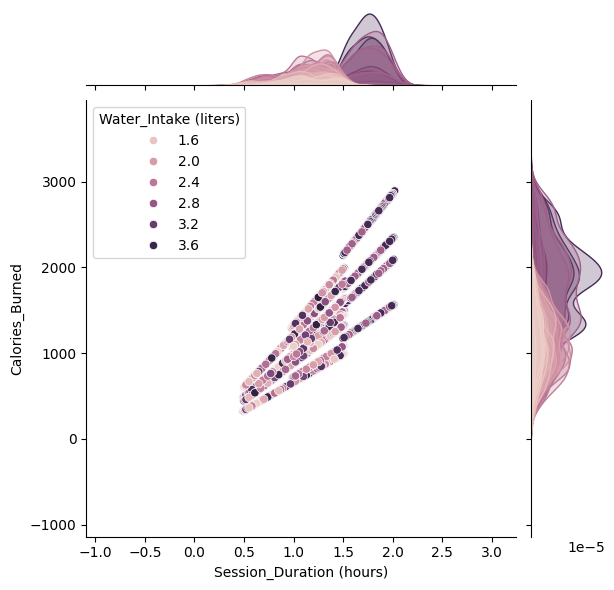

In [52]:


# sns.lmplot(data=prob_one, x="Workout_Frequency (days/week)", y="Calories_Burned")
# sns.lmplot(data=prob_one, x="Workout_Frequency (days/week)", y="Water_Intake (liters)")

sns.jointplot(data=prob_one, x="Session_Duration (hours)",y="Calories_Burned", hue="Water_Intake (liters)")

# this line automatically plots the regression line for me, using this function (just for visualizations right now)




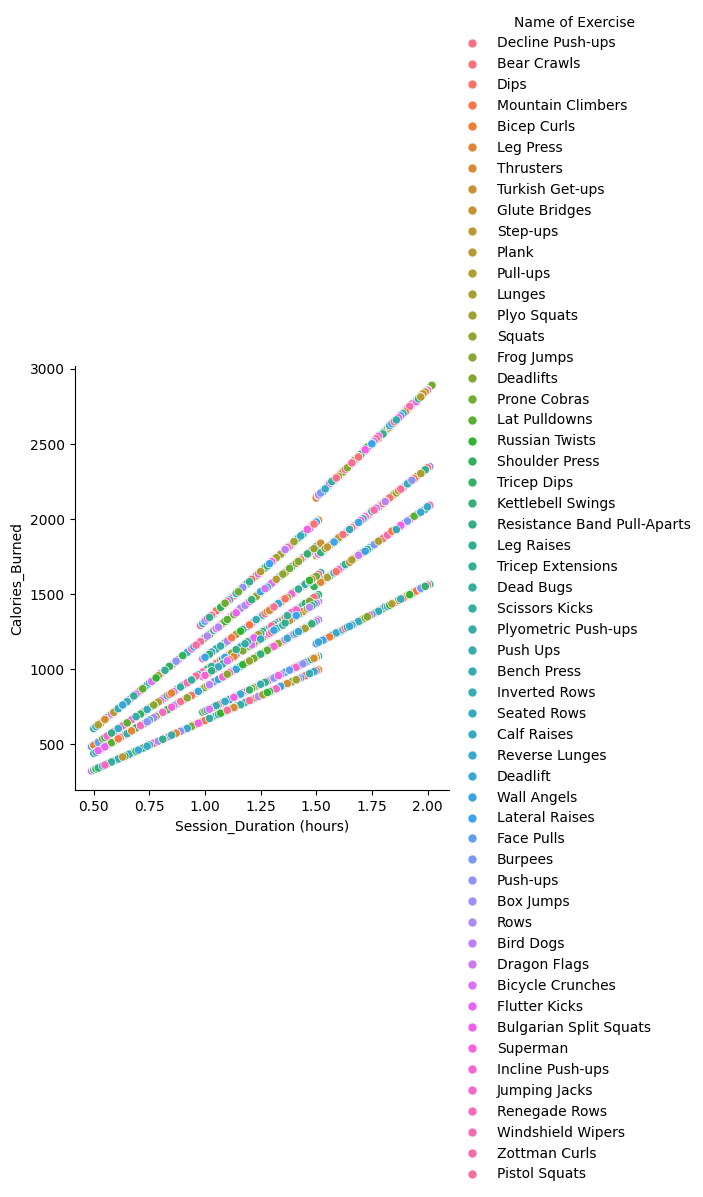

In [53]:
sns.relplot(
    data=prob_one,
    x="Session_Duration (hours)",
    y="Calories_Burned",
    hue="Name of Exercise",
    kind="scatter"
)




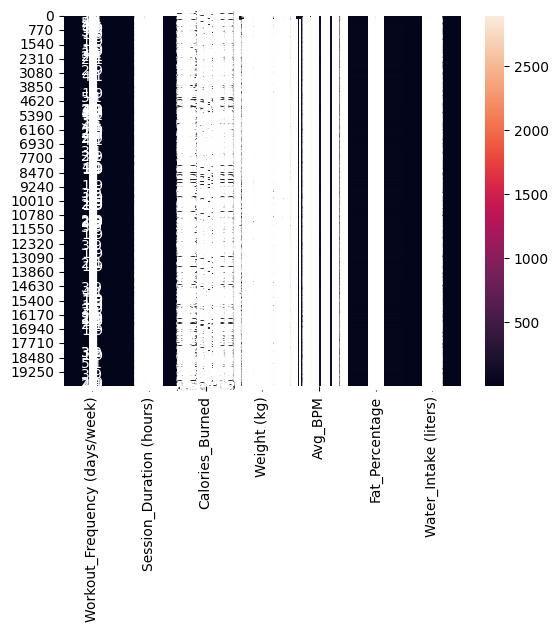

In [54]:
from matplotlib import colors

data = df_clean

hm = sns.heatmap(data=data, annot=True)

plt.show()

THIS IS A GRAPH WITH A LOT OF NOISE, CANNOT DEDUCE A LOT FROM HERE


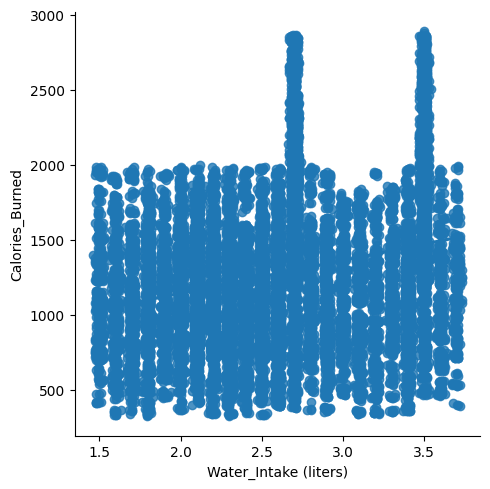

In [55]:

sns.lmplot(x="Water_Intake (liters)",y="Calories_Burned",data=prob_one)
print("THIS IS A GRAPH WITH A LOT OF NOISE, CANNOT DEDUCE A LOT FROM HERE")

honestly this looks like a weak correlation between water intake and calories burned, I guess I was wrong with my assessment, however lets look at other variables


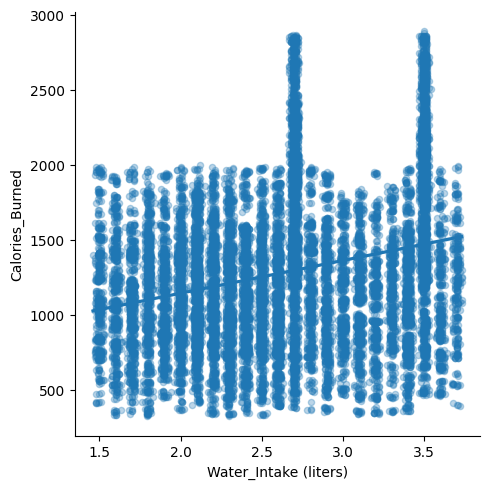

In [56]:
x = prob_one[["Water_Intake (liters)","Calories_Burned"]].corr()
sns.lmplot(
    x="Water_Intake (liters)",
    y="Calories_Burned",
    data=prob_one,
    scatter_kws={"alpha": 0.3, "s":20}
)

print("honestly this looks like a weak correlation between water intake and calories burned, I guess I was wrong with my assessment, however lets look at other variables")

I tried to go even narrower by only focusing on bench presses in this graph


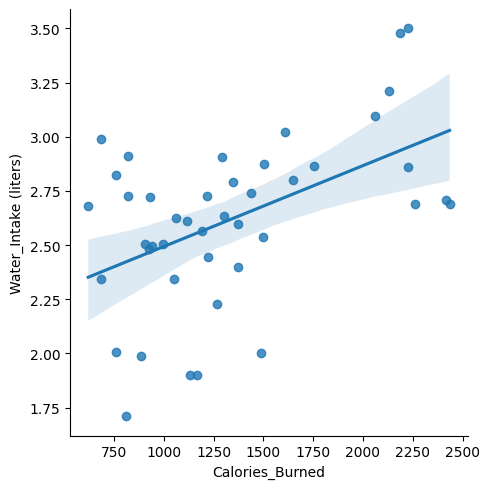

In [57]:
print("I tried to go even narrower by only focusing on bench presses in this graph")
bench_press = prob_one[prob_one["Name of Exercise"] == "Bench Press"]

bench_avg = bench_press.groupby("Workout_Frequency (days/week)").mean(numeric_only=True).reset_index()
sns.lmplot(data=bench_avg, x="Calories_Burned", y="Water_Intake (liters)")



